In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df

,Date,Revenue,Expense,Net Cashflow,Cumulative Cashflow
0,2023-01-31,25795,10311,15484,15484
1,2023-02-28,10860,22568,-11708,3776
2,2023-03-31,48158,24769,23389,27165
3,2023-04-30,21284,33693,-12409,14756
4,2023-05-31,16265,11396,4869,19625
5,2023-06-30,26850,32480,-5630,13995
6,2023-07-31,47194,30658,16536,30531
7,2023-08-31,31962,23942,8020,38551
8,2023-09-30,26023,23431,2592,41143
9,2023-10-31,11685,7747,3938,45081


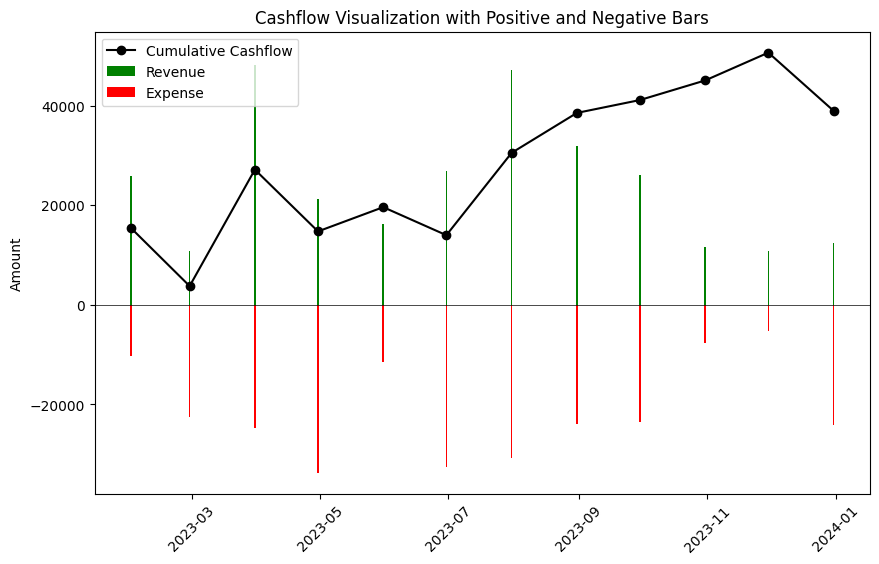

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dummy data (use your CSV path if needed)
data = {
    'Date': ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
             '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
    'Revenue': [25795, 10860, 48158, 21284, 16265, 26850, 47194, 31962, 26023, 11685, 10769, 12433],
    'Expense': [10311, 22568, 24769, 33693, 11396, 32480, 30658, 23942, 23431, 7747, 5189, 24118]
}

df = pd.DataFrame(data)

# Convert the Date column to datetime for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the net cash flow and cumulative cash flow
df['Net Cashflow'] = df['Revenue'] - df['Expense']
df['Cumulative Cashflow'] = df['Net Cashflow'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot revenue and expenses as bars
ax.bar(df['Date'], df['Revenue'], label='Revenue', color='green')
ax.bar(df['Date'], -df['Expense'], label='Expense', color='red')

# Plot cumulative cashflow as a line on the same axis
ax.plot(df['Date'], df['Cumulative Cashflow'], color='black', marker='o', label='Cumulative Cashflow')

# Formatting the plot
ax.set_title('Cashflow Visualization with Positive and Negative Bars')
ax.set_ylabel('Amount')
ax.legend(loc='upper left')

# Add a horizontal line at y=0
plt.axhline(0, color='black',linewidth=0.5)

plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load the dummy data
data = {
    'Date': ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
             '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
    'Revenue': [25795, 10860, 48158, 21284, 16265, 26850, 47194, 31962, 26023, 11685, 10769, 12433],
    'Expense': [10311, 22568, 24769, 33693, 11396, 32480, 30658, 23942, 23431, 7747, 5189, 24118]
}

df = pd.DataFrame(data)

# Convert the Date column to datetime for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the net cash flow and cumulative cash flow
df['Net Cashflow'] = df['Revenue'] - df['Expense']
df['Cumulative Cashflow'] = df['Net Cashflow'].cumsum()

# Create a Plotly figure
fig = go.Figure()

# Add bars for revenue (above the line)
fig.add_trace(go.Bar(
    x=df['Date'], 
    y=df['Revenue'], 
    name='Revenue', 
    marker_color='green'
))

# Add bars for expenses (below the line, negative values)
fig.add_trace(go.Bar(
    x=df['Date'], 
    y=-df['Expense'], 
    name='Expense', 
    marker_color='red'
))

# Add a line for cumulative cashflow
fig.add_trace(go.Scatter(
    x=df['Date'], 
    y=df['Cumulative Cashflow'], 
    mode='lines+markers', 
    name='Cumulative Cashflow', 
    marker_color='black'
))

# Customize the layout
fig.update_layout(
    title='Cashflow Visualization with Plotly',
    yaxis_title='Amount',
    xaxis_title='Date',
    barmode='overlay',  # Make sure bars are on the same axis
    hovermode='x',      # Ensure hover info displays for all traces on the x-axis
    bargap=0.2,         # Space between bars
    plot_bgcolor='white'
)

# Show the interactive chart
fig.show()


In [43]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

class ModelCashflow:
    def __init__(self):
        # Initialize an empty dictionary to hold dataframes for different companies
        self.collection_df = {}

    def add_company_data(self, company_name, df):
        """
        Adds a new company's cashflow dataframe to the collection.
        :param company_name: Name of the company (string).
        :param df: Dataframe containing Date, Revenue, Expense columns.
        """
        # Check if the dataframe has the correct columns
        if not {'Date', 'Revenue', 'Expense'}.issubset(df.columns):
            raise ValueError("Dataframe must contain 'Date', 'Revenue', and 'Expense' columns.")
        
        # Ensure Date is in datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Add company data to collection
        self.collection_df[company_name] = df

    def cashflow_plot(self):
        """
        Generates an interactive Plotly cashflow plot.
        Combines data from all added companies and displays their cashflow and cumulative cashflow line.
        """
        # Create a Plotly figure
        fig = go.Figure()

        # Variable to accumulate the total revenue and expense
        accumulated_revenue = None
        accumulated_expense = None

        # Loop through each company in the collection and plot the revenue and expense
        for company_name, df in self.collection_df.items():
            # print(f'Company: {company_name}, Data: {df}')  # Debugging: print company data
            

            # Add bars for expenses for each company (same color for all companies' expense)
            fig.add_trace(go.Bar(
                x=df['Date'], 
                y=-df['Expense'],  # Expenses are negative
                name='Expense',  # We only show the company name in the legend
                marker_color='red',
                legendgroup=company_name,  # Group revenue and expense by company for toggling
                showlegend=False,  # Don't show separate legend for expenses
                customdata=np.stack((df['Revenue'], df['Expense']), axis=-1),
                hovertemplate=(
                    f'<b>{company_name}</b><br>' +
                    # 'Date: %{x}<br>' +
                    # '%{customdata[0]:,.0f}<br>' 
                    '%{customdata[1]:,.0f}<br>'
                )
            ))

            # Add bars for revenue for each company (same color for all companies' revenue)
            fig.add_trace(go.Bar(
                x=df['Date'], 
                y=df['Revenue'], 
                name='Revenue',  # We only show the company name in the legend
                marker_color='blue',
                legendgroup=company_name,  # Group revenue and expense by company for toggling
                showlegend=False,  # Don't show the revenue in the legend again
                customdata=np.stack((df['Revenue'], df['Expense']), axis=-1),  # Include both revenue and expense for hover
                hovertemplate=(
                    f'<b>{company_name}</b><br>' +
                    # 'Date: %{x}<br>' +
                    '%{customdata[0]:,.0f}<br>' 
                    # 'Expense: %{customdata[1]:,.0f}<extra></extra>'
                )
            ))


            
                        # Add invisible scatter trace for company name in the legend (black or grey)
            fig.add_trace(go.Scatter(
                x=[None],  # Empty scatter to only display in legend
                y=[None],
                mode='markers',
                marker=dict(color='grey'),  # Change this to 'black' if you prefer black
                name=company_name,
                legendgroup=company_name,  # Group revenue and expense by company for toggling
                showlegend=True
            ))

            # Accumulate the revenue and expense for cumulative calculation
            if accumulated_revenue is None:
                accumulated_revenue = df['Revenue'].copy()
                accumulated_expense = df['Expense'].copy()
            else:
                accumulated_revenue += df['Revenue']
                accumulated_expense += df['Expense']

        # Calculate the net and cumulative cashflow
        net_cashflow = accumulated_revenue - accumulated_expense
        cumulative_cashflow = net_cashflow.cumsum()

        # Add a line for cumulative cashflow
        fig.add_trace(go.Scatter(
            x=df['Date'], 
            y=cumulative_cashflow, 
            mode='lines+markers', 
            name='Cumulative Cashflow', 
            marker_color='black',
            line=dict(dash='solid'),
            hovertemplate=(
                '<b>Cumulative Cashflow</b><br>' +
                'Date: %{x}<br>' +
                'Cumulative Cashflow: %{y:,.0f}<extra></extra>'
            )
        ))

        # Customize the layout
        fig.update_layout(
            title='Consolidated Cashflow Visualization with Cumulative Line',
            yaxis_title='Amount',
            xaxis_title='Date',
            hovermode='x',  # Ensure hover info displays for all traces on the x-axis
            bargap=0.2,  # Space between bars
            plot_bgcolor='white',
            barmode='relative'  # Stack bars relative to each other (shows totals if multiple are active)
        )

        # Show the interactive chart
        fig.show()




In [44]:
# Example usage
# Initialize the model
cashflow_model = ModelCashflow()

# Adding example company data
data1 = {
    'Date': ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'],
    'Revenue': [25795, 10860, 48158, 21284],
    'Expense': [10311, 22568, 24769, 33693]
}
df1 = pd.DataFrame(data1)

data2 = {
    'Date': ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'],
    'Revenue': [30000, 20000, 40000, 35000],
    'Expense': [12000, 24000, 28000, 34000]
}
df2 = pd.DataFrame(data2)

# Add companies' data
cashflow_model.add_company_data('Company 1', df1)
cashflow_model.add_company_data('Company 2', df2)

# Plot the cashflow
cashflow_model.cashflow_plot()

Company: Company 1, Data:         Date  Revenue  Expense
0 2023-01-31    25795    10311
1 2023-02-28    10860    22568
2 2023-03-31    48158    24769
3 2023-04-30    21284    33693
Company: Company 2, Data:         Date  Revenue  Expense
0 2023-01-31    30000    12000
1 2023-02-28    20000    24000
2 2023-03-31    40000    28000
3 2023-04-30    35000    34000
